# Figure 2

### Summary
This script makes Figure 2, showing evolution of pseudo-vorticity of vhf sources.

### Input
This script uses the `exported.dat` file obtained from using the lasso selection tool in the XLMA software.

### Output
This script generates a `.png` image of Figure 2.

In [1]:
# libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from dataclasses import dataclass
from scipy.signal import savgol_filter

plt.rcParams.update({"xtick.labelsize": 12, "ytick.labelsize": 12})

In [2]:
# variables

# these flash initiation files are processed using the output of the lmatools package
CYPRESS_FLASH_INIT = r"data/flash initiation/cypress_fi.csv"

TIME_START = pd.Timestamp("2025-11-24 18:00:00")
TIME_END = pd.Timestamp("2025-11-24 20:00:00")
TORNADO_START = pd.Timestamp("2025-11-24 19:20:00")
TORNADO_END = pd.Timestamp("2025-11-24 19:50:00")

@dataclass(frozen=True)
class LMA_CENTER:
    lat: float = 29.76
    lon: float = -95.37

In [4]:
# preparing data
# spc storm reports
spc = pd.DataFrame({
    "label": ["EF1 Cypress", "EF2 Klein"],
    "datetime": [pd.Timestamp("2025-11-24 19:26:00"),  pd.Timestamp("2025-11-24 19:46:00")],
    "lat": [29.94, 30.04],
    "lon": [-95.68, -95.54],
})

In [8]:
curl = pd.read_csv(CYPRESS_FLASH_INIT, parse_dates=['datetime'])
curl.sort_values('datetime', inplace=True)

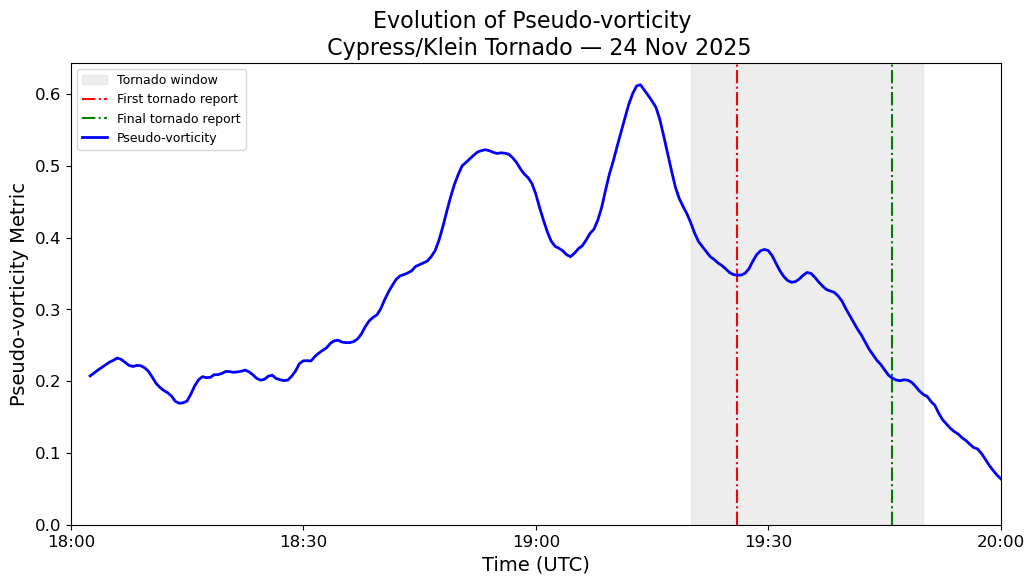

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))

# tornado active region
ax.axvspan(TORNADO_START, TORNADO_END, color="lightgray", alpha=0.4, label="Tornado window")

# spc report vertical lines
ax.axvline(spc.iloc[0].datetime, color="red", linestyle="-.", label='First tornado report')
ax.axvline(spc.iloc[1].datetime, color="green", linestyle="-.", label='Final tornado report')

# lightning curl
ax.plot(curl.datetime, curl.curl_core_smooth, color="blue", linewidth=2, label="Pseudo-vorticity")

# axes formatting
ax.set_title("Evolution of Pseudo-vorticity \n Cypress/Klein Tornado — 24 Nov 2025", fontsize=16)
ax.set_xlim(TIME_START, TIME_END)
ax.set_ylim(0)
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.set_ylabel("Pseudo-vorticity Metric", fontsize=14)
ax.set_xlabel("Time (UTC)", fontsize=14)
ax.legend(loc="upper left", fontsize=9)

plt.savefig("figure2.png", bbox_inches="tight")
plt.show()